# Weather Data Analysis in Ithaca, NY from 2021.01 to 2022.04

**Authors:** <br>
Zhongyi (James) Guo (zg268@cornell.edu) <br>
Zixian (Maggie) Huang (zh359@cornell.edu)<br>
**Authors are in no particular order.** <br>
**Github Repository:** https://github.com/JG1ANDONLY/Weather_Data_Analysis_in_Ithaca_NY <br>
**Date:** 04/27/2022

## Introduction

Ithaca often starts snowing unexpectedly. In this project, we want to study if we can seek to predict when to snow based on the temperature. We hypothesize that it is more likely to snow with lower temperatures.<br>

We plan to build two models to study how temperature affects the likelihood of snowing. Hence, we raised this question: <br> 
- **Can the range of temperature support predictions of snowing?**

## Data Description

- columns:<br>
`STATION`: The identification number of the observation station. <br>
`NAME`: The name of the observation station. <br>
`LATITUDE`: The latitude of the observation station location (unit: °N). <br>
`LONGITUDE`: The longitude of the observation station location (unit: °W).<br>
`ELEVATION`: The elevation of the observation station location (unit: ft). <br>
`DATE`: The date of the data recorded. <br>
`EVAP`: The amount of evaporation (unit: in).<br>
`EVAP_ATTRIBUTES`: The attribute for evaporation. <br>
`PRCP`: The amount of precipitation (unit: in). <br>
`PRCP_ATTRIBUTES`: The attribute for precipitation. <br>
`SNOW`: The amount of snow (unit: in). <br>
`SNOW_ATTRIBUTES`: The attribute for snow. <br>
`SNWD`: The amount of snow measured at the observation station location (unit: in). <br>
`SNWD_ATTRIBUTES`: The attribute for snow measured at the observation station location.<br>
`TMAX`: The maximum temperature (unit: °F). <br>
`TMAX_ATTRIBUTES`: The attribute for maximum temperature. <br>
`TMIN`: The minimum temperature (unit: °F). <br>
`TMIN_ATTRIBUTES`: The attribute for minimum temperature. <br>
`TOBS`:	The temperature measured at the observation station (unit: °F). <br>
`TOBS_ATTRIBUTES`: The attribute for the temperature measured at the observation station location. <br>

- rows:<br>
Weather data in every day from 2021-01-01 to 2022-04-19.<br>

The dataset `Cornell_Weather_Data_2021.1-2022.4.xlsx` was downloaded from: https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00304174/detail, published by the National Centers For Environmental Information. The cleaned dataset I am using is in this GitHub Repository: https://github.com/JG1ANDONLY/Weather_Data_Analysis_in_Ithaca_NY.

## Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Cornell_Weather_Data_2021.1-2022.4.xlsx")
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,EVAP,EVAP_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES
0,USC00304174,"ITHACA CORNELL UNIVERSITY, NY US",42.44915,-76.44905,292.6,2021-01-01,NaN,NaN,0.00,",,7,0700",0.0,",,7,0700",0,",,7,0700",33,",,7",25,",,7",26,",,7,0700"
1,USC00304174,"ITHACA CORNELL UNIVERSITY, NY US",42.44915,-76.44905,292.6,2021-01-02,NaN,NaN,0.47,",,7,0700",0.0,",,7,0700",0,",,7,0700",40,",,7",24,",,7",40,",,7,0700"
2,USC00304174,"ITHACA CORNELL UNIVERSITY, NY US",42.44915,-76.44905,292.6,2021-01-03,NaN,NaN,0.00,"T,,7,0700",0.0,"T,,7,0700",0,",,7,0700",42,",,7",27,",,7",27,",,7,0700"
3,USC00304174,"ITHACA CORNELL UNIVERSITY, NY US",42.44915,-76.44905,292.6,2021-01-04,NaN,NaN,0.14,",,7,0700",1.4,",,7,0700",1,",,7,0700",35,",,7",27,",,7",32,",,7,0700"
4,USC00304174,"ITHACA CORNELL UNIVERSITY, NY US",42.44915,-76.44905,292.6,2021-01-05,NaN,NaN,0.00,"T,,7,0700",0.0,"T,,7,0700",1,",,7,0700",33,",,7",30,",,7",30,",,7,0700"


The column names are all in capital letters, which is not easy for later reference. We will convert them into lowercase first.

In [3]:
df.columns = [i.lower() for i in df.columns]

In [4]:
print(df.columns)

Index(['station', 'name', 'latitude', 'longitude', 'elevation', 'date', 'evap',
       'evap_attributes', 'prcp', 'prcp_attributes', 'snow', 'snow_attributes',
       'snwd', 'snwd_attributes', 'tmax', 'tmax_attributes', 'tmin',
       'tmin_attributes', 'tobs', 'tobs_attributes'],
      dtype='object')


Because all data in `df` come from one specific observation station at Cornell University, Ithaca, NY, with ID number USC00304174, `station`, `name`, `latitude`, `longitude`, `elevation` are redundant identification columns that we can drop.

In [5]:
df.drop(labels = ['station', 'name', 'latitude', 'longitude', 'elevation'], axis = 1, inplace = True)
df.head()

,date,evap,evap_attributes,prcp,prcp_attributes,snow,snow_attributes,snwd,snwd_attributes,tmax,tmax_attributes,tmin,tmin_attributes,tobs,tobs_attributes
0,2021-01-01,NaN,NaN,0.00,",,7,0700",0.0,",,7,0700",0,",,7,0700",33,",,7",25,",,7",26,",,7,0700"
1,2021-01-02,NaN,NaN,0.47,",,7,0700",0.0,",,7,0700",0,",,7,0700",40,",,7",24,",,7",40,",,7,0700"
2,2021-01-03,NaN,NaN,0.00,"T,,7,0700",0.0,"T,,7,0700",0,",,7,0700",42,",,7",27,",,7",27,",,7,0700"
3,2021-01-04,NaN,NaN,0.14,",,7,0700",1.4,",,7,0700",1,",,7,0700",35,",,7",27,",,7",32,",,7,0700"
4,2021-01-05,NaN,NaN,0.00,"T,,7,0700",0.0,"T,,7,0700",1,",,7,0700",33,",,7",30,",,7",30,",,7,0700"


All columns whose names end with "attributes" are placeholders. They don't have actual meanings. So we decided to drop them to make our dataframe more concise.

In [6]:
df.drop(labels = ['evap_attributes', 'prcp_attributes', 'snow_attributes', 'snwd_attributes',
                  'tmax_attributes', 'tmin_attributes', 'tobs_attributes'], axis = 1, inplace = True)
df.head()

,date,evap,prcp,snow,snwd,tmax,tmin,tobs
0,2021-01-01,NaN,0.00,0.0,0,33,25,26
1,2021-01-02,NaN,0.47,0.0,0,40,24,40
2,2021-01-03,NaN,0.00,0.0,0,42,27,27
3,2021-01-04,NaN,0.14,1.4,1,35,27,32
4,2021-01-05,NaN,0.00,0.0,1,33,30,30


We will save the cleaned dataframe to a new file called `final_data` so that we don't need to perform data cleaning every time we reopen this notebook.

In [7]:
df.to_csv("final_data.csv", index = False)

## Exploratory Data Analysis (EDA) and Data Visualization

In [8]:
df = pd.read_csv("final_data.csv")
df.head()

,date,evap,prcp,snow,snwd,tmax,tmin,tobs
0,2021-01-01,NaN,0.00,0.0,0,33,25,26
1,2021-01-02,NaN,0.47,0.0,0,40,24,40
2,2021-01-03,NaN,0.00,0.0,0,42,27,27
3,2021-01-04,NaN,0.14,1.4,1,35,27,32
4,2021-01-05,NaN,0.00,0.0,1,33,30,30


We will then calculate summary statistics to better understand `df`.

In [9]:
df.describe()

,evap,prcp,snow,snwd,tmax,tmin,tobs
count,175.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,0.161371,0.121799,0.249036,1.665953,53.436831,33.961456,39.477516
std,0.077514,0.274922,0.978357,3.825566,20.566175,19.122112,18.608717
min,0.020000,0.000000,0.000000,0.000000,4.000000,-20.000000,-20.000000
25%,0.100000,0.000000,0.000000,0.000000,35.000000,22.000000,26.000000
50%,0.160000,0.010000,0.000000,0.000000,52.000000,32.000000,38.000000
75%,0.220000,0.095000,0.000000,1.000000,72.000000,50.000000,55.000000
max,0.340000,2.210000,11.500000,24.000000,93.000000,71.000000,77.000000


Next, we will perform some data visualization and try to detect any patterns and some potential relationships between `tmax`, `tmin`, and `snow`.

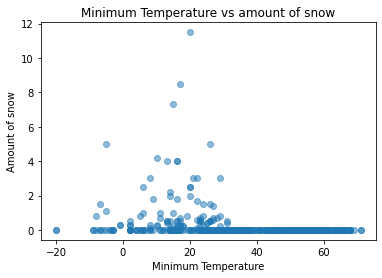

In [10]:
plt.scatter(df["tmin"], df["snow"], alpha = 0.5)
plt.xlabel("Minimum Temperature")
plt.ylabel("Amount of snow")
plt.title("Minimum Temperature vs amount of snow");

We realized that in spring, summer, and fall, no snow is observed. So we decided to look at the winter interval only. Winter is defined as from December to March by WeatherSpark (website: https://weatherspark.com/y/22130/Average-Weather-in-Ithaca-New-York-United-States-Year-Round). So we want to focus on data recorded between December and March and create a new dataframe called `df_temp_snow`.

In [11]:
winter = ["12", "01", "02", "03"]
result_index = []
for i in df["date"].index:
    if df.loc[i, "date"][5:7] in winter:
        result_index.append(i)
df_temp_snow = df.loc[result_index]
df_temp_snow.head()

,date,evap,prcp,snow,snwd,tmax,tmin,tobs
0,2021-01-01,NaN,0.00,0.0,0,33,25,26
1,2021-01-02,NaN,0.47,0.0,0,40,24,40
2,2021-01-03,NaN,0.00,0.0,0,42,27,27
3,2021-01-04,NaN,0.14,1.4,1,35,27,32
4,2021-01-05,NaN,0.00,0.0,1,33,30,30


### Minimum temperature vs. Amount of snow

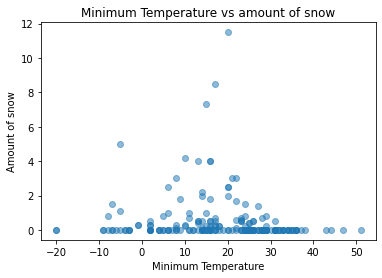

In [12]:
plt.scatter(df_temp_snow["tmin"], df_temp_snow["snow"], alpha = 0.5)
plt.xlabel("Minimum Temperature")
plt.ylabel("Amount of snow")
plt.title("Minimum Temperature vs amount of snow");

### Maximum temperature vs. Amount of snow

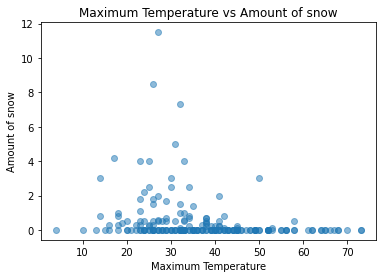

In [13]:
plt.scatter(df_temp_snow["tmax"], df_temp_snow["snow"], alpha = 0.5)
plt.xlabel("Maximum Temperature")
plt.ylabel("Amount of snow")
plt.title("Maximum Temperature vs Amount of snow");

### Precipitation vs. Amount of snow

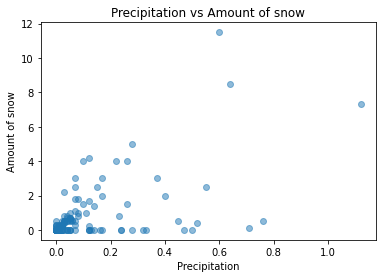

In [14]:
plt.scatter(df_temp_snow["prcp"], df_temp_snow["snow"], alpha = 0.5)
plt.xlabel("Precipitation")
plt.ylabel("Amount of snow")
plt.title("Precipitation vs Amount of snow");

## Model Building & Inferences

### Snow or Not? - Logistic Regression Model

Now we want to create dummy variables to indicate whether that date snowed or not.

In [15]:
snow_dummies = []
for i in df_temp_snow.index:
    if df_temp_snow.loc[i, "snow"] > 0.0:
        snow_dummies.append(1)
    else:
        snow_dummies.append(0)
df_temp_snow["snow?"] = snow_dummies
df_temp_snow.head()

,date,evap,prcp,snow,snwd,tmax,tmin,tobs,snow?
0,2021-01-01,NaN,0.00,0.0,0,33,25,26,0
1,2021-01-02,NaN,0.47,0.0,0,40,24,40,0
2,2021-01-03,NaN,0.00,0.0,0,42,27,27,0
3,2021-01-04,NaN,0.14,1.4,1,35,27,32,1
4,2021-01-05,NaN,0.00,0.0,1,33,30,30,0


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

We will create a logistic model and try to predict whether it will snow or not after spliting train and test sets.

In [17]:
X = df_temp_snow[["tmin", "tmax"]]
Y = df_temp_snow["snow?"]

temp_train, temp_test, snow_train, snow_test = train_test_split(X, Y, test_size = 0.2)

logistic_model = LogisticRegression()
logistic_model.fit(temp_train, snow_train)

pred_train_log = logistic_model.predict(temp_train)
pred_test_log = logistic_model.predict(temp_test)

print("Test Accuracy: ", accuracy_score(snow_test, pred_test_log))
print("Train Accuracy: ", accuracy_score(snow_train, pred_train_log))

Test Accuracy:  0.8095238095238095
Train Accuracy:  0.6545454545454545


We have good accuracy scores for both training sets and testing set. I am confident to say that we can rely on this model and predict if it is going to snow using the range of temperature in a specific day by plugging in the minimum temperature and maximum temperature.

### Snow or Not? - KNN Model

In this model, we will use the same train and test sets as in the previous section. Then, we will try to alternate `k` to see which `k` gives us the best performance.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Model when k = 1
knn_model = KNeighborsClassifier(1)
knn_model.fit(temp_train, snow_train)
pred_test_knn = knn_model.predict(temp_test)
pred_train_knn = knn_model.predict(temp_train)

In [20]:
print("Test accuracy", accuracy_score(snow_test, pred_test_knn))
print("Train Accuracy: ", accuracy_score(snow_train, pred_train_knn))

Test accuracy 0.6190476190476191
Train Accuracy:  0.9454545454545454


In [21]:
# Model when k = 10
knn_model = KNeighborsClassifier(10)
knn_model.fit(temp_train, snow_train)
pred_test_knn = knn_model.predict(temp_test)
pred_train_knn = knn_model.predict(temp_train)

In [22]:
print("Test accuracy", accuracy_score(snow_test, pred_test_knn))
print("Train Accuracy: ", accuracy_score(snow_train, pred_train_knn))

Test accuracy 0.7857142857142857
Train Accuracy:  0.7575757575757576


In [23]:
# Model when k = 5
knn_model = KNeighborsClassifier(5)
knn_model.fit(temp_train, snow_train)
pred_test_knn = knn_model.predict(temp_test)
pred_train_knn = knn_model.predict(temp_train)

In [24]:
print("Test accuracy", accuracy_score(snow_test, pred_test_knn))
print("Train Accuracy: ", accuracy_score(snow_train, pred_train_knn))

Test accuracy 0.6428571428571429
Train Accuracy:  0.7878787878787878


When k = 5, both accuracy scores are the best. So we will keep the model with k = 10.

In [27]:
# Model when k = 10
knn_model = KNeighborsClassifier(10)
knn_model.fit(temp_train, snow_train)
pred_test_knn = knn_model.predict(temp_test)
pred_train_knn = knn_model.predict(temp_train)
print("Test accuracy", accuracy_score(snow_test, pred_test_knn))
print("Train Accuracy: ", accuracy_score(snow_train, pred_train_knn))

Test accuracy 0.7857142857142857
Train Accuracy:  0.7575757575757576


## Error Analysis

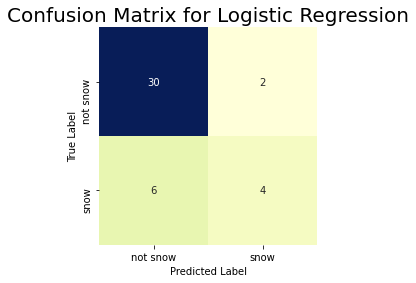

In [25]:
# Use confusion matrix to tune and validate model
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(snow_test, logistic_model.predict(temp_test)).ravel()
(tn+tp)/(tn+tp+fp+fn)

# Plot a confusion matrix for error analysis
plt.figure()
con_matrix = confusion_matrix(snow_test, logistic_model.predict(temp_test))
sns.heatmap(con_matrix, cmap='YlGnBu', annot=True, cbar=False, square=True, 
            xticklabels=['not snow', 'snow'], yticklabels=['not snow', 'snow'] )

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 20)
plt.show()

In summary, we've randomly split the data into training and target sets. The logistics model was able to accurately classify 30 instances of not snowing and 4 instances of snowing, which is good.

However, there are 8 instances of incorrect classifications. There are 6 cases of false positives, where Ithaca were expected to snow when it actually didn't, and 2 cases of false negatives, where the weather was expected to be sunny when it actually snowed.

Thus, we see that our model produces a test accuracy of 80% and training accuracy of 65%.

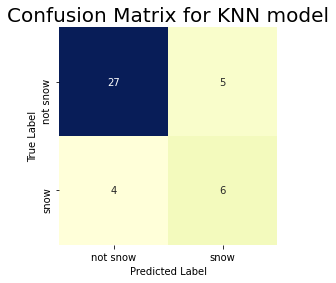

In [28]:
tn, fp, fn, tp = confusion_matrix(snow_test, knn_model.predict(temp_test)).ravel()
(tn+tp)/(tn+tp+fp+fn)

# Plot a confusion matrix for error analysis
plt.figure()
con_matrix = confusion_matrix(snow_test, knn_model.predict(temp_test))
sns.heatmap(con_matrix, cmap='YlGnBu', annot=True, cbar=False, square=True, 
            xticklabels=['not snow', 'snow'], yticklabels=['not snow', 'snow'] )

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for KNN model', fontsize = 20)
plt.show()

In summary, we've randomly split the data into training and target sets. The KNN model was able to accurately classify 27 instances of not snowing and 6 instances of snowing, which is good.

However, there are 9 instances of incorrect classifications. There are 4 cases of false positives, where Ithaca were expected to snow when it actually didn't, and 5 cases of false negatives, where the weather was expected to be sunny when it actually snowed.

Thus, we see that our model produces a test accuracy of 78% and training accuracy of 75%.

## Discussion

One possible limitation is, snowing itself is a random event, which means, even when the temperature is low enough, or the humidity is high enough to snow, it is still likely to not snow.

## Conclusion

With the high accuracy scores of both models, we are confident to say that the range of temperature can help us predict whether that day will snow or not.